# Telecom Customer Churn Analysis

Data Source: https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/

**Dataset:**
1. CustomerID - Customer ID
2. Gender - 0 or 1
3. Senior Citizen- whether or not senior citizen
4. Partner - whether or not our partner
5. Dependents - No or Yes
6. Tenure - Length of tenure
7. PhoneService -No or Yes
8. MultipleLines - No phone service, No, Yes
9. InternetService - DSL, Fiber Optic, No
10. OnlineSecurity -Yes, No, No internet service
11. OnlineBackup - Yes, No, No internet service
12. DeviceProtection - Yes, No, No internet service
13. TechSupport - Yes, No, No internet service
14. StreamingTV - Yes, No, No internet service
15. StreamingMovies - Yes, No, No internet service
16. Contract - Monthly, Yealry, Two Year
17. PaperlessBilling - Yes or No
18. PaymentMethod - Electronic check, Mailed check, Credit Card etc
19. MonthlyCharges - Monthly Charges
20. TotalCharges - Total Charges to this customer yet
21. Churn - Yes or No

Points about **"Customer Churn"** : 

Customer Churn rate is the number of customers who left within a time period divided by the number of active customers at the start of that period.
Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.
In Customer Churn Analysis, we wish to predict which customers are likely to churn and retain them. 
In this endeavor, we would like to recognise the factors that lead to churn and seal the leaking bucket.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

We start by loading the dataset.

In [2]:
df = pd.read_csv("ChurnData.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We find 7043 unique data points which is not a bad number of data points for analysis.

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Dropping the Customer ID since it is not relevant to our analysis.

In [5]:
df=df.drop(['customerID'],axis=1)

Since we see that variable "TotalCharges" is numeric value but coded in the dataframe as string object, we need to change the data type to float.

In [6]:
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
#Checking whether conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


Done!

Same with Senior Citizen which is coded as "int" but should be coded as category.

In [8]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null category
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: category(1), float64(2), int64(1), object(16)
memory usage: 1.

Done!

Checking whether there are any empty rows.

In [10]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

There are some empty rows in "TotalCharges" column.

In [11]:
df["TotalCharges"].isna().sum()

11

Since number of null values are very low, we can choose to simply drop them.

In [12]:
df = df.dropna()

In [13]:
df.shape

(7032, 20)

In [14]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Separating out categorical and numerical values because both need different analysis.

In [15]:
categorical = ['gender', 'SeniorCitizen','Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [16]:
for n in categorical:
    print("\nNumber of Categories in",n ,": \n", df[n].unique())


Number of Categories in gender : 
 ['Female' 'Male']

Number of Categories in SeniorCitizen : 
 [0, 1]
Categories (2, int64): [0, 1]

Number of Categories in Partner : 
 ['Yes' 'No']

Number of Categories in Dependents : 
 ['No' 'Yes']

Number of Categories in PhoneService : 
 ['No' 'Yes']

Number of Categories in MultipleLines : 
 ['No phone service' 'No' 'Yes']

Number of Categories in InternetService : 
 ['DSL' 'Fiber optic' 'No']

Number of Categories in OnlineSecurity : 
 ['No' 'Yes' 'No internet service']

Number of Categories in OnlineBackup : 
 ['Yes' 'No' 'No internet service']

Number of Categories in DeviceProtection : 
 ['No' 'Yes' 'No internet service']

Number of Categories in TechSupport : 
 ['No' 'Yes' 'No internet service']

Number of Categories in StreamingTV : 
 ['No' 'Yes' 'No internet service']

Number of Categories in StreamingMovies : 
 ['No' 'Yes' 'No internet service']

Number of Categories in Contract : 
 ['Month-to-month' 'One year' 'Two year']

Number of Ca

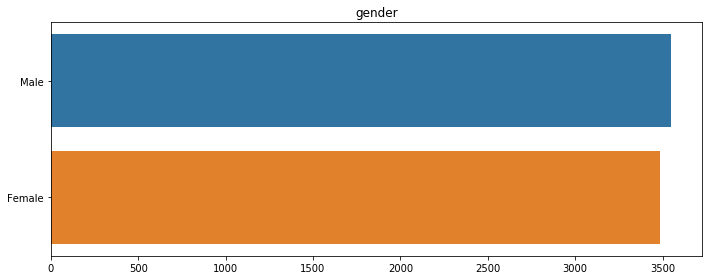

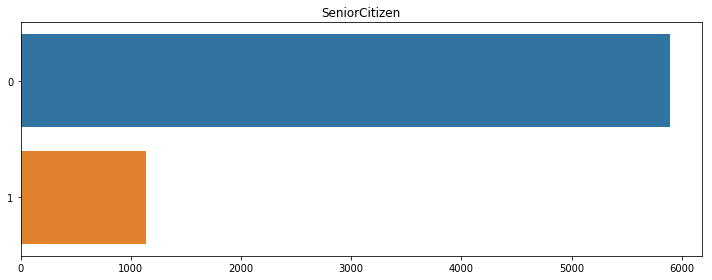

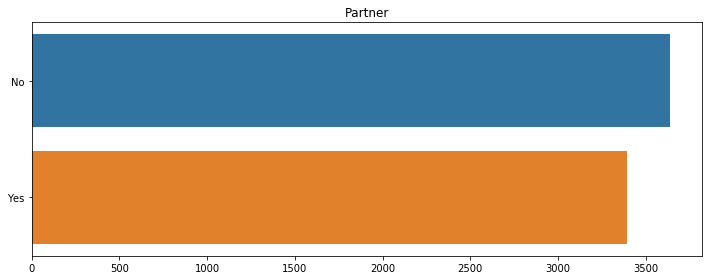

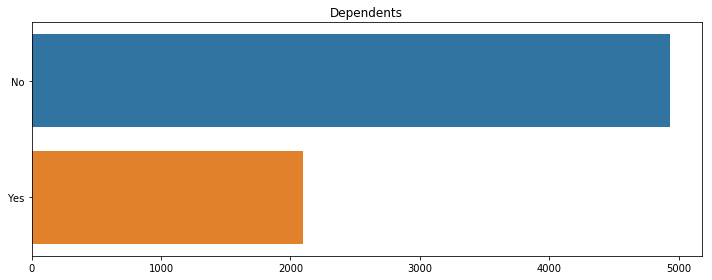

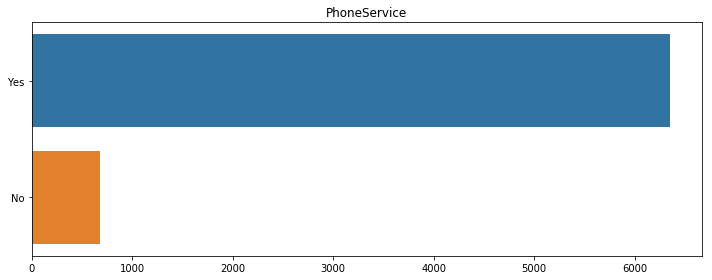

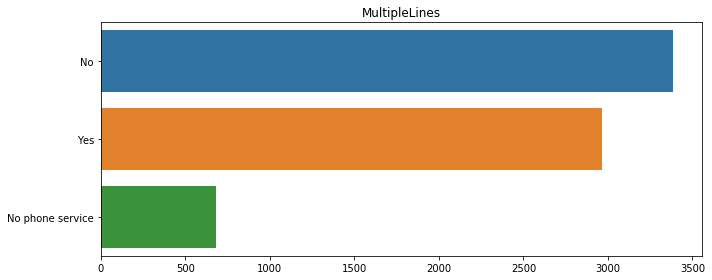

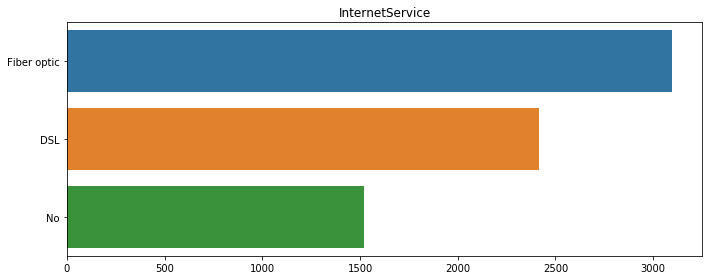

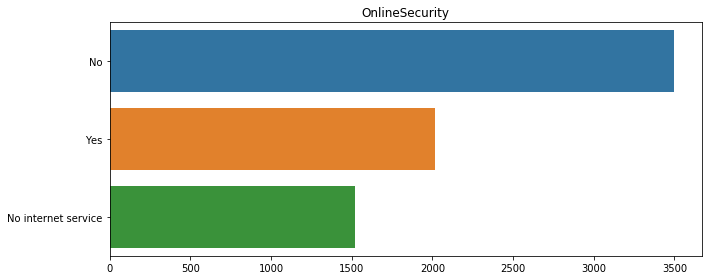

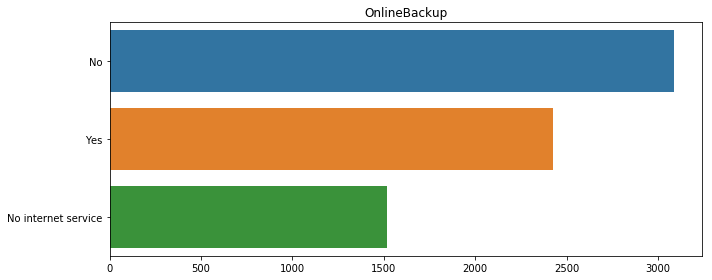

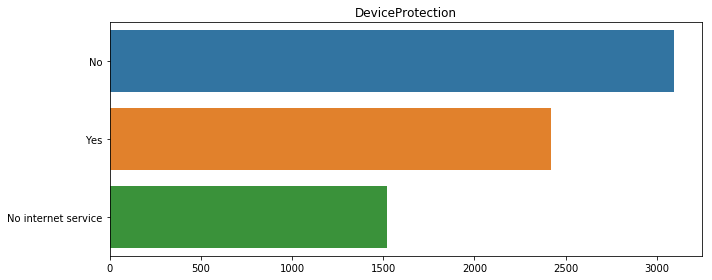

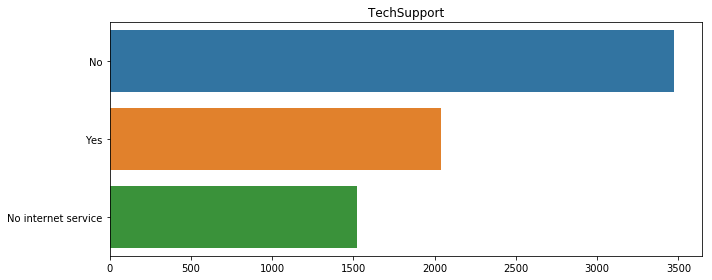

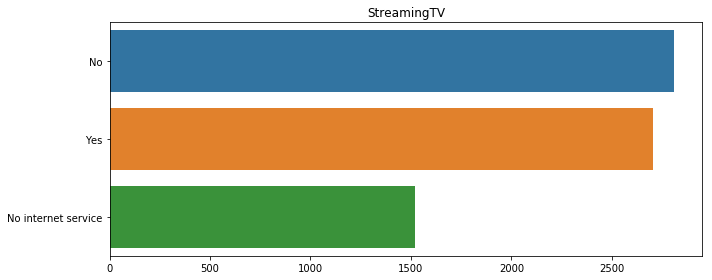

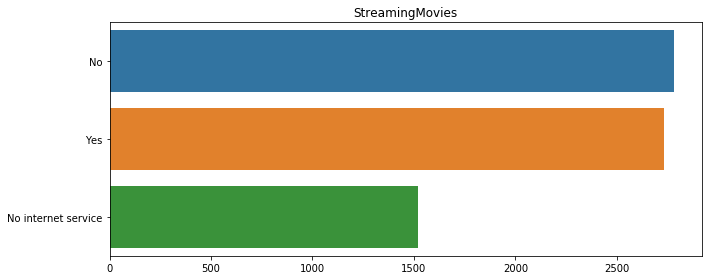

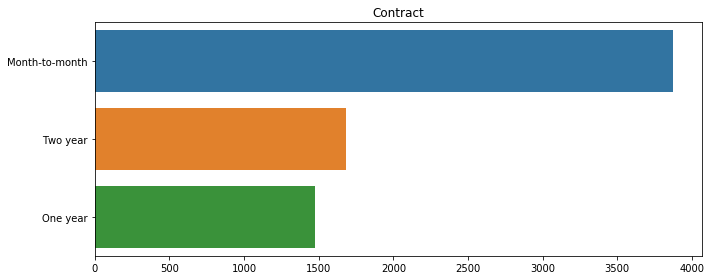

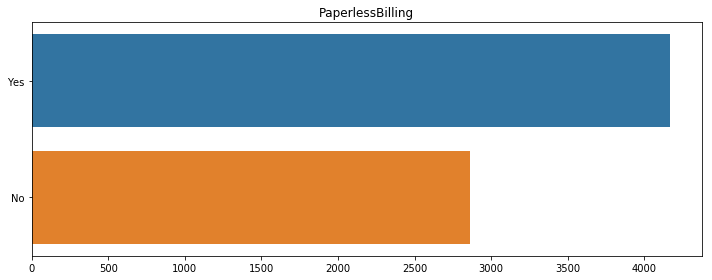

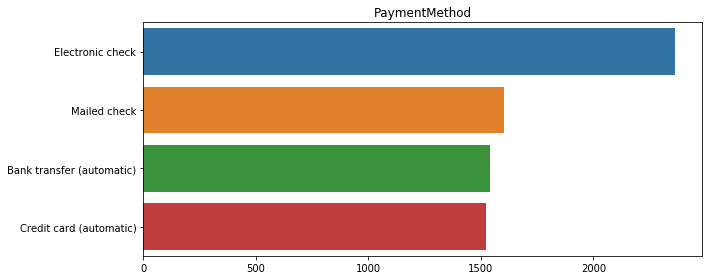

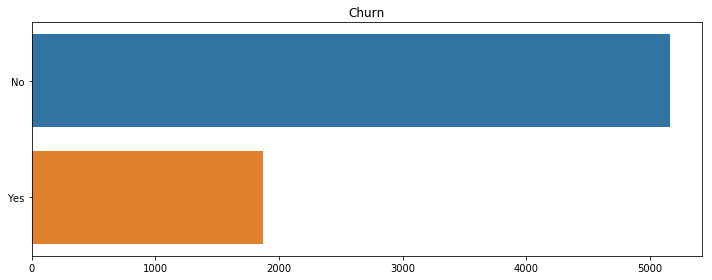

In [17]:
for n in categorical:
    plt.figure(figsize=(10,4))
    sns.barplot(df[n].value_counts().values, df[n].value_counts().index)
    plt.title(n)
    plt.tight_layout()

We find categorical variables balanced. There are no categories which are highly skewed.

In [18]:
for n in numerical:
    print("For Churn, Mean value of ",n, ":",df[n].loc[df['Churn']=='Yes'].mean())
    print("For Churn, Standard Deviation of ",n,":",df[n].loc[df['Churn']=='Yes'].std())
    print("For No Churn, Mean value of ",n,":",df[n].loc[df['Churn']=='No'].mean())
    print("For No Churn, Standard Deviation of ", n, ":",df[n].loc[df['Churn']=='No'].std())
    print("")

For Churn, Mean value of  tenure : 17.979133226324237
For Churn, Standard Deviation of  tenure : 19.531123054519615
For No Churn, Mean value of  tenure : 37.65000968429208
For No Churn, Standard Deviation of  tenure : 24.076940499817656

For Churn, Mean value of  MonthlyCharges : 74.4413322632423
For Churn, Standard Deviation of  MonthlyCharges : 24.666053259397426
For No Churn, Mean value of  MonthlyCharges : 61.30740848343966
For No Churn, Standard Deviation of  MonthlyCharges : 31.09455690667259

For Churn, Mean value of  TotalCharges : 1531.7960941680035
For Churn, Standard Deviation of  TotalCharges : 1890.8229944644045
For No Churn, Mean value of  TotalCharges : 2555.3441410032997
For No Churn, Standard Deviation of  TotalCharges : 2329.4569835604375



Box plot of Numerical Variables vis-a-vis y


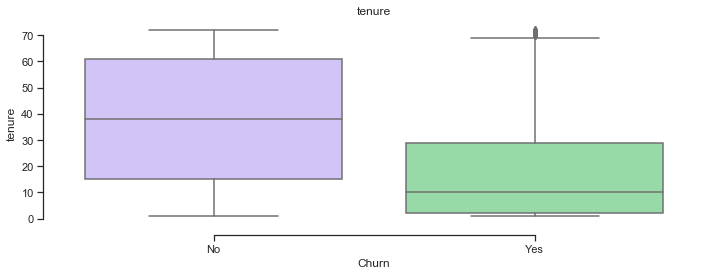

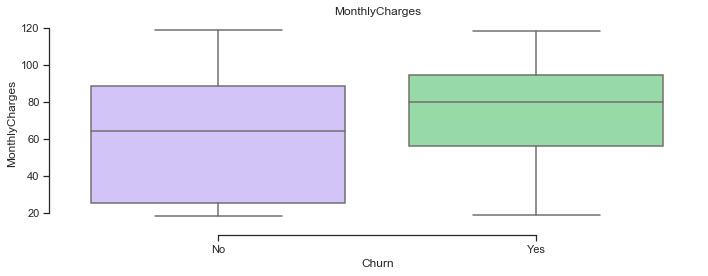

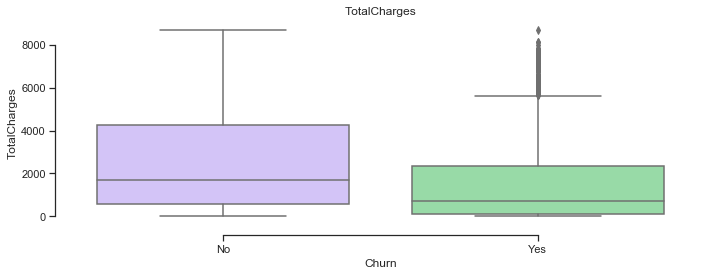

In [19]:
print("Box plot of Numerical Variables vis-a-vis y")
for n in numerical:
    plt.figure(figsize=(10,4))
    sns.set(style="ticks", palette="pastel")
    sns.boxplot(x="Churn", y=df[n],
             palette=["m", "g"],
            data=df)
    sns.despine(offset=10, trim=True)
    plt.title(n)
    plt.tight_layout()

We find the "TotalCharges" box plot funny with lots of high outliers with Churn = "Yes".
We are inclined to believe that people with high "TotalCharges" tend to Churn. 
We investigate the distribution closely to see if we can discover any trends.

In [20]:
#Helper Function
#Total Charges for people who churn
def plotChargesChurn(df):
    df = df.loc[df["Churn"]== 'Yes']
    plt.hist(df["TotalCharges"], density=True, bins=30)
#Helper function
#Total Charges for people do not churn
def plotChargesNoChurn(df):
    df = df.loc[df["Churn"]== 'No']
    plt.hist(df["TotalCharges"], density=True, bins=30)

Distribution of "TotalCharges" for people who Churned.

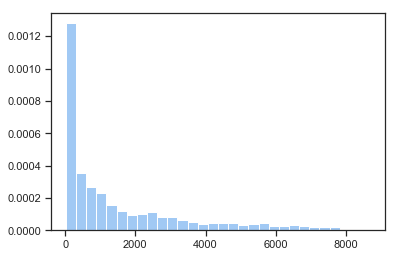

In [21]:
plotChargesChurn(df)

Distribution of "TotalCharges" for people who did not Churn

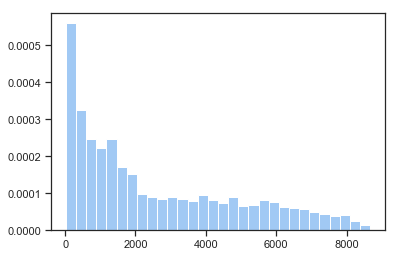

In [22]:
plotChargesNoChurn(df)

In [23]:
#Helper Function
#Total Charges for people who churn
def plotChargesChurnHigh(df):
    df = df.loc[df["Churn"]== 'Yes']
    df= df.loc[df["TotalCharges"]>6000]
    plt.hist(df["TotalCharges"], density=True, bins=30)
#Helper function
#Total Charges for people do not churn
def plotChargesNoChurnHigh(df):
    df = df.loc[df["Churn"]== 'No']
    df= df.loc[df["TotalCharges"]>6000]
    plt.hist(df["TotalCharges"], density=True, bins=30)

An initial look suggests that when people "Churn", the distribution is biased towards the left. Which may suggest that people who "Churn" do so on habitual basis. People with high "TotalCharges" rarely "Churn".
However, to confirm our hypothesis, we would like to take a closer look at the higher values of "TotalCharges"(TotalCharges > 6000), because that's where we found many outliers.

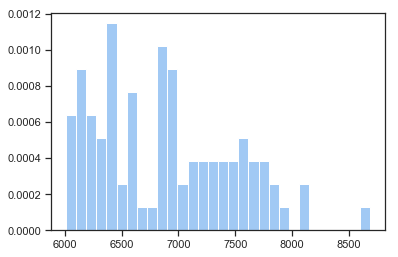

In [24]:
plotChargesChurnHigh(df)

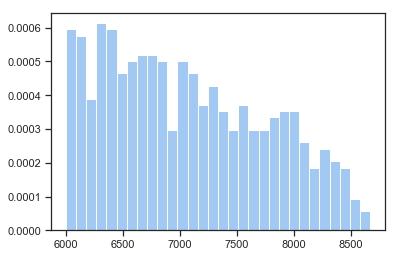

In [25]:
plotChargesNoChurnHigh(df)

We susptected that high churn may be realted to high "TotalCharges" based on the box plot with many outliers. Plotting them shows us that there is some trend that people with low total charges may churn, which may show that they habitutally change services as offers are available.

We now wish to plot categorical variables vis a vis Churn to see if we can find any trend.

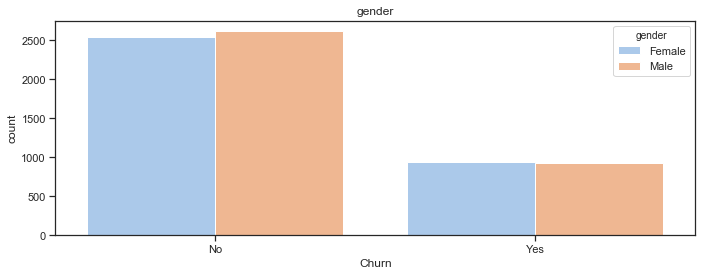

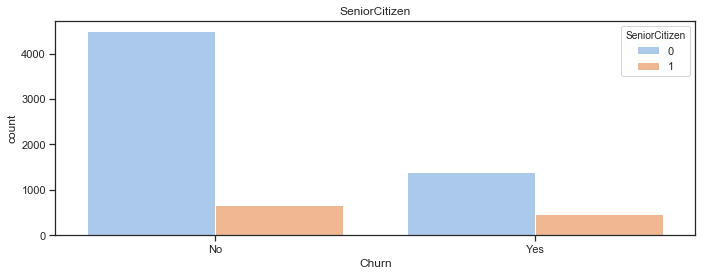

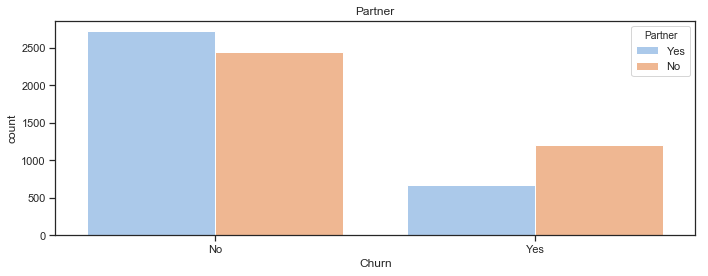

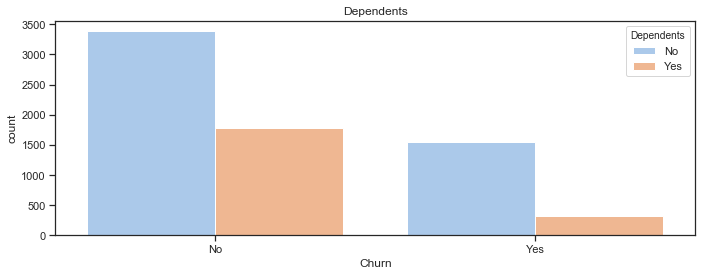

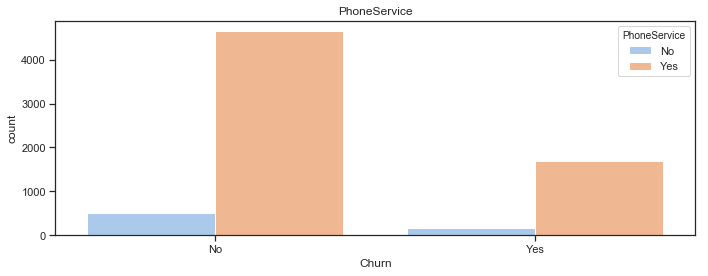

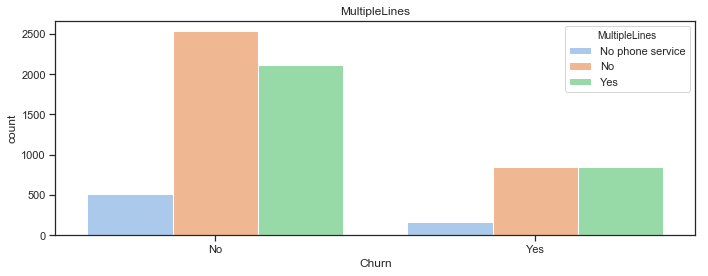

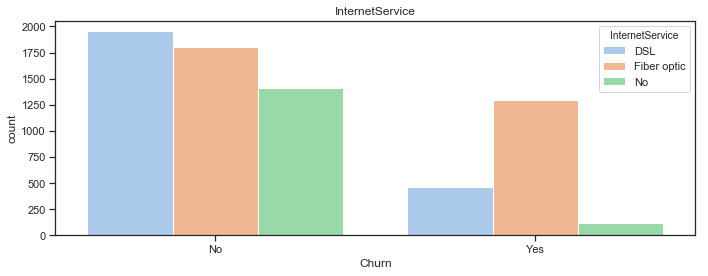

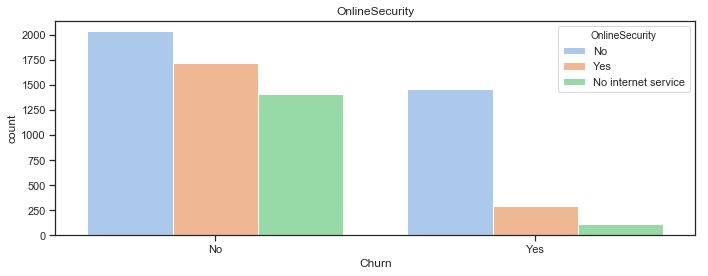

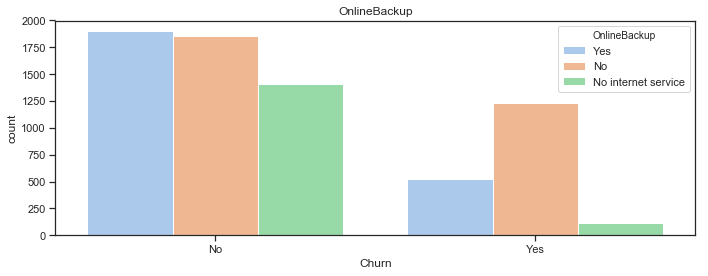

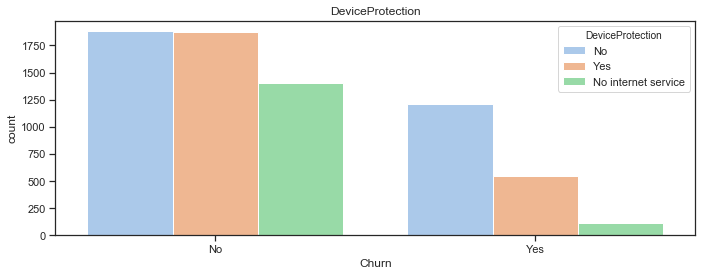

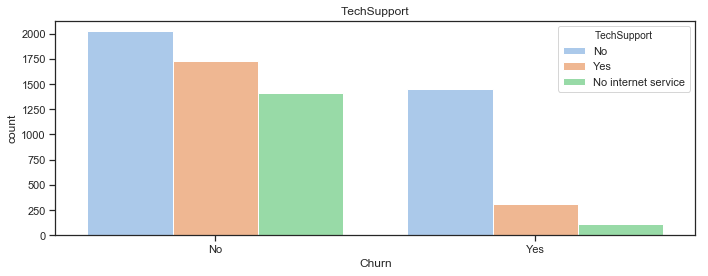

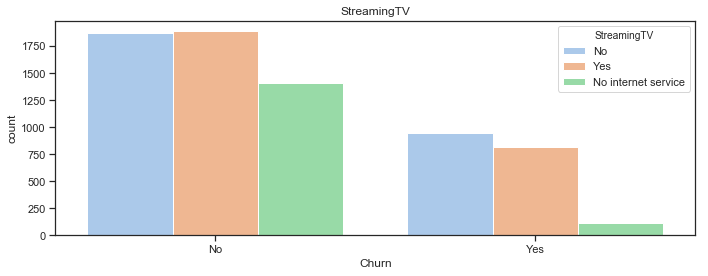

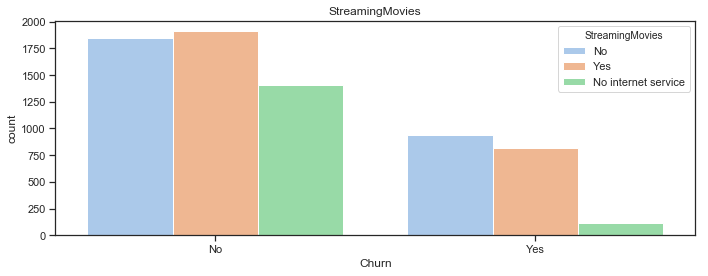

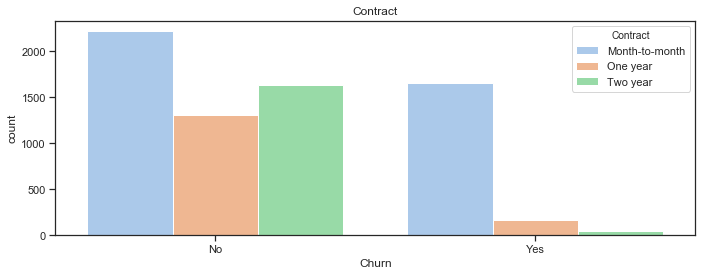

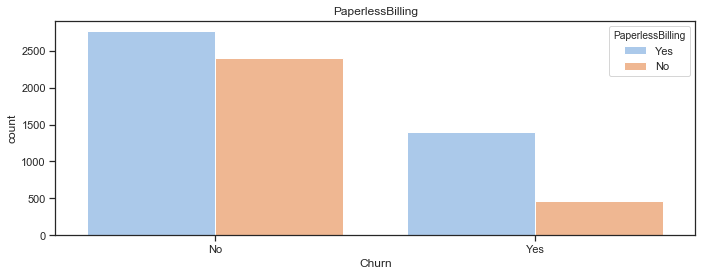

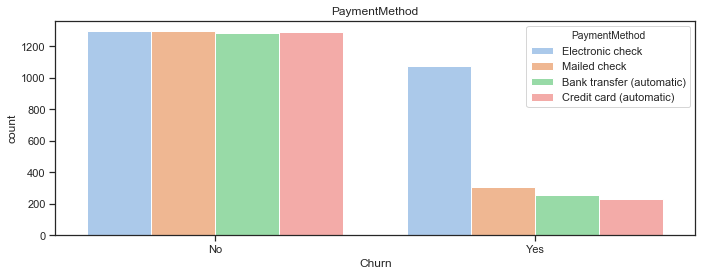

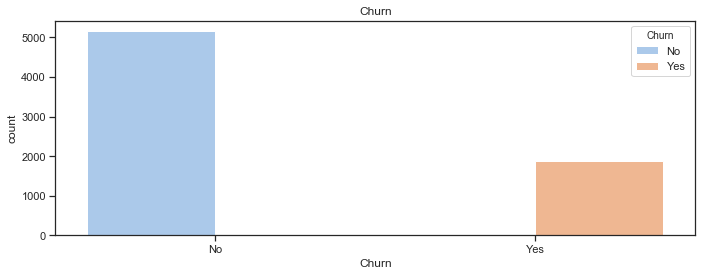

In [26]:
for n in categorical:
    plt.figure(figsize=(10,4))
    sns.countplot(x='Churn', hue = n, data=df) 
    plt.title(n)
    plt.tight_layout()



We observe all the distributions carefully but fail to find any obvious correlations with Churn.

Converting the categorical variables to dummy variables.

In [27]:
df.loc[(df['Churn'] == 'No'), 'Churn'] = 0
df.loc[(df['Churn'] == 'Yes'), 'Churn'] = 1

In [28]:
from sklearn.preprocessing import LabelEncoder
for n in categorical:
    labelencoder_X = LabelEncoder()
    df[n] = labelencoder_X.fit_transform(df[n]) 


Checking if successfully done.

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


We will now calcuate and plot the correlation matrix to see if any features are correlated to Churn.

In [30]:
import math
corr = df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


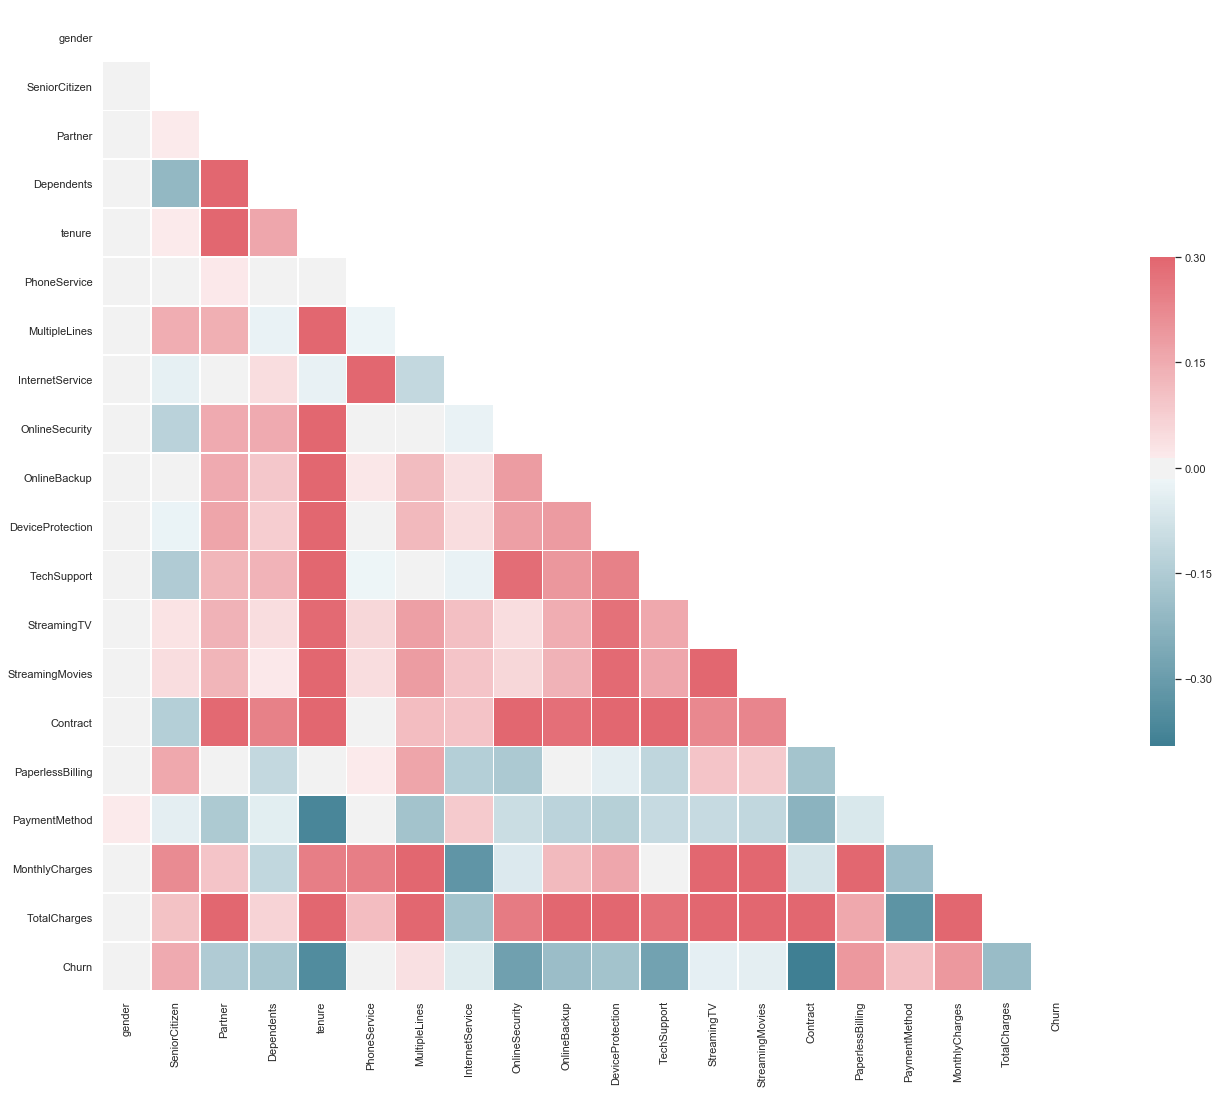

In [31]:
#plotting of heatmap of correlation
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

We see positive correlations with Senior Citizen, Monthly Charges and negative correlations with tenure, online security and Contract. 

In [32]:
Y = np.asarray(df['Churn'])
X = np.asarray(df.drop('Churn', axis=1))

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

**Logistic Regression with hyperparameter optimization of L1 penalty**

In [34]:
c = np.arange(0.001,1,0.05)
aucs = []
for i in c:
    Logmodel = LogisticRegression(C=i, penalty='l1', tol=0.01, solver='liblinear')
    Logmodel.fit(X_train,y_train)
    y_pred = Logmodel.predict(X_test)
    print("For regularization term", i, ", Accuracy: \n", accuracy_score(y_test, y_pred))
    aucs.append(accuracy_score(y_test, y_pred))

For regularization term 0.001 , Accuracy: 
 0.7647476901208244
For regularization term 0.051000000000000004 , Accuracy: 
 0.7910447761194029
For regularization term 0.101 , Accuracy: 
 0.7938877043354655
For regularization term 0.15100000000000002 , Accuracy: 
 0.7917555081734187
For regularization term 0.201 , Accuracy: 
 0.7768301350390903
For regularization term 0.251 , Accuracy: 
 0.7910447761194029
For regularization term 0.30100000000000005 , Accuracy: 
 0.7803837953091685
For regularization term 0.35100000000000003 , Accuracy: 
 0.7796730632551528
For regularization term 0.401 , Accuracy: 
 0.7860696517412935
For regularization term 0.451 , Accuracy: 
 0.7924662402274343
For regularization term 0.501 , Accuracy: 
 0.7889125799573561
For regularization term 0.551 , Accuracy: 
 0.7839374555792467
For regularization term 0.6010000000000001 , Accuracy: 
 0.7739872068230277
For regularization term 0.651 , Accuracy: 
 0.7867803837953091
For regularization term 0.7010000000000001 , Acc

We get accuracy hovering around 79%

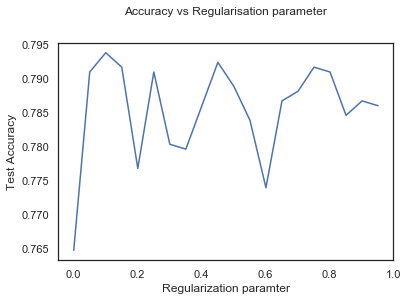

In [35]:
plt.plot(c, aucs)
plt.title('Accuracy vs Regularisation parameter', y=1.1)
plt.xlabel('Regularization paramter')
plt.ylabel('Test Accuracy')
plt.show()

Choosing the best model.

In [36]:
Logmodel = LogisticRegression(C=0.1, penalty='l1', tol=0.01, solver='liblinear')
Logmodel.fit(X_train,y_train)
y_pred = Logmodel.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7668798862828714


Drawing the Confusion matrix and AUC curve

Text(0.5, 257.44, 'Predicted')

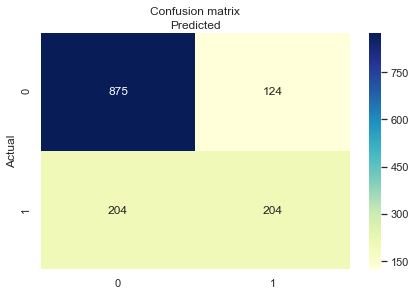

In [37]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

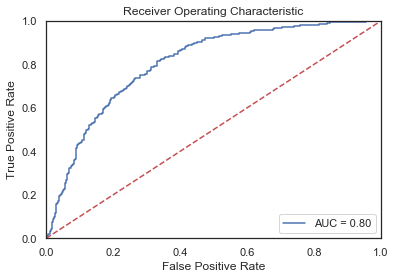

In [38]:
probs = Logmodel.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

While an AUC of 0.84 is certainly not bad, we will attempt to improve this. We did not get much improvement using hyperparameter optimization of L1 norm.

Now, we remove those features which the correlation matrix predicted lacked correlation with Churn. Maybe this can improve the model.

In [39]:
X = np.asarray(df.drop(['gender','PhoneService','StreamingTV','StreamingMovies','Churn'], axis=1))
Y = np.asarray(df['Churn'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [41]:
c = np.arange(0.001,1,0.05)
aucs = []
for i in c:
    Logmodel = LogisticRegression(C=i, penalty='l1', tol=0.01, solver='liblinear')
    Logmodel.fit(X_train,y_train)
    y_pred = Logmodel.predict(X_test)
    print("For regularization term", i, "Accuracy: \n", accuracy_score(y_test, y_pred))
    aucs.append(accuracy_score(y_test, y_pred))

For regularization term 0.001 Accuracy: 
 0.7654584221748401
For regularization term 0.051000000000000004 Accuracy: 
 0.7839374555792467
For regularization term 0.101 Accuracy: 
 0.7846481876332623
For regularization term 0.15100000000000002 Accuracy: 
 0.7796730632551528
For regularization term 0.201 Accuracy: 
 0.7839374555792467
For regularization term 0.251 Accuracy: 
 0.7739872068230277
For regularization term 0.30100000000000005 Accuracy: 
 0.7860696517412935
For regularization term 0.35100000000000003 Accuracy: 
 0.7853589196872779
For regularization term 0.401 Accuracy: 
 0.7882018479033405
For regularization term 0.451 Accuracy: 
 0.7803837953091685
For regularization term 0.501 Accuracy: 
 0.7818052594171997
For regularization term 0.551 Accuracy: 
 0.7867803837953091
For regularization term 0.6010000000000001 Accuracy: 
 0.7882018479033405
For regularization term 0.651 Accuracy: 
 0.783226723525231
For regularization term 0.7010000000000001 Accuracy: 
 0.7867803837953091
For

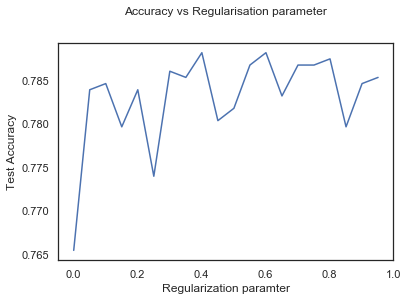

In [42]:
plt.plot(c, aucs)
plt.title('Accuracy vs Regularisation parameter', y=1.1)
plt.xlabel('Regularization paramter')
plt.ylabel('Test Accuracy')
plt.show()

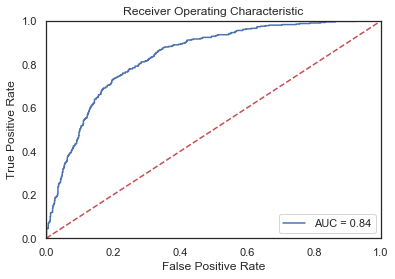

In [43]:
probs = Logmodel.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 257.44, 'Predicted')

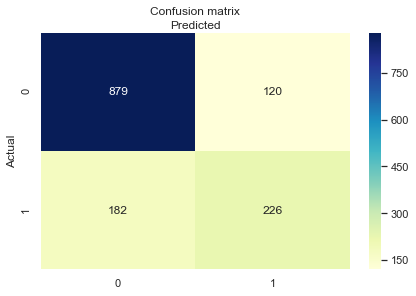

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

We do not find any noticable improvement by dropping the features. The results are nearly same. So we will stick to our previous model which gave slightly better results. We replicate the same below.

In [45]:
#Final Model:
Y = np.asarray(df['Churn'])
X = np.asarray(df.drop('Churn', axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
Logmodel = LogisticRegression(C=0.15, penalty='l1', tol=0.01, solver='liblinear')
Logmodel.fit(X_train,y_train)    
y_pred = Logmodel.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.7938877043354655

Precision, Recall and F1 values for the best Model.

In [47]:
from sklearn.metrics import classification_report
print('\n',classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407



Text(0.5, 257.44, 'Predicted')

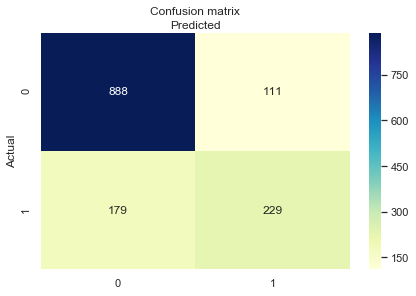

In [48]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

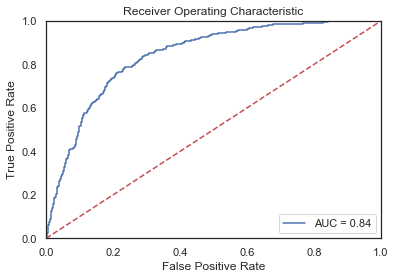

In [49]:
probs = Logmodel.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Recommendation to the Marketing team:**

1. Try to focus greater attention to securing yearly contracts and longer tenures, these people are less likely to churn at the end of their contract
2. Try to focus greater attention to businesses who get multiple lines, internet lines and fixed lengthy tenures
3. Try to get more people into being partners, they tend to be loyal customers and act as company evangelists
4. People who received tech support were less likely to churn, which means tech support is doing a great job of resolving problems. Tech support should be strengthened and people should be encouraged to talk with tech support for any trouble. Tech support should be pushed as a company strength. 